## Name: Erfan Shahabi
## Student_ID: 810103166

## بخش ۱


In [1]:
!python -m pip install drawdata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 842.5/842.5 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.9 MB/s eta 0:00:00


In [2]:
import ipywidgets as widgets
from drawdata import ScatterWidget
from IPython.core.display import HTML, Markdown, display
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split


import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#@title interactive_classifier_comparison implementation

def interactive_classifier_comparison():
    """Creates an interactive widget for comparing two classifiers."""
    widget = ScatterWidget()
    output = widgets.Output()

    classifiers = {
        "SVC (RBF)": SVC(kernel='rbf'),
        "SVC (Linear)": SVC(kernel='linear'),
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Gaussian NB": GaussianNB(),
        "KNN": KNeighborsClassifier()
    }

    classifier_dropdown_1 = widgets.Dropdown(
        options=list(classifiers.keys()),
        value="SVC (RBF)",
        description="Model 1:"
    )
    classifier_dropdown_2 = widgets.Dropdown(
        options=list(classifiers.keys()),
        value="Logistic Regression",
        description="Model 2:"
    )

    @output.capture(clear_output=True)
    def on_change(change):
        df = widget.data_as_pandas
        if len(df) and (df['color'].nunique() > 1):
            X = df[['x', 'y']].values
            y = df['color']
            le = LabelEncoder()
            y_encoded = le.fit_transform(y)

            clf1 = classifiers[classifier_dropdown_1.value]
            clf2 = classifiers[classifier_dropdown_2.value]

            clf1.fit(X, y_encoded)
            clf2.fit(X, y_encoded)

            display(Markdown("<br><br><br>"))
            display(Markdown(
                f"### Model 1: {classifier_dropdown_1.value} <br> Parameters:{clf1.get_params()}"))
            display(Markdown(
                f"### Model 2: {classifier_dropdown_2.value} <br> Parameters:{clf2.get_params()}"))

            # Plotting side-by-side
            fig, axs = plt.subplots(1, 2, figsize=(12, 6))

            plt.sca(axs[0])
            plot_decision_regions(X, y_encoded, clf=clf1)
            plt.title(f'{classifier_dropdown_1.value}')
            plt.xlabel('x')
            plt.ylabel('y')

            plt.sca(axs[1])
            plot_decision_regions(X, y_encoded, clf=clf2)
            plt.title(f'{classifier_dropdown_2.value}')
            plt.xlabel('x')
            plt.ylabel('y')

            plt.tight_layout()
            plt.show()

    # Observe all relevant changes
    widget.observe(on_change, names=["data"])
    classifier_dropdown_1.observe(on_change, names=["value"])
    classifier_dropdown_2.observe(on_change, names=["value"])

    # Initial trigger
    on_change(None)

    # Display interface
    display(widgets.VBox([
        widgets.HBox([classifier_dropdown_1, classifier_dropdown_2]),
        widgets.HBox([widget, output])
    ]))

## اجرا یک نمونه جدید از مقایسه

In [4]:
interactive_classifier_comparison()

In [5]:
interactive_classifier_comparison()

In [6]:
interactive_classifier_comparison()

## بخش ۲

### loading the dataset

In [7]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

## SOLUTION SECTION

In [9]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## ب

label
1    357
0    212
Name: count, dtype: int64


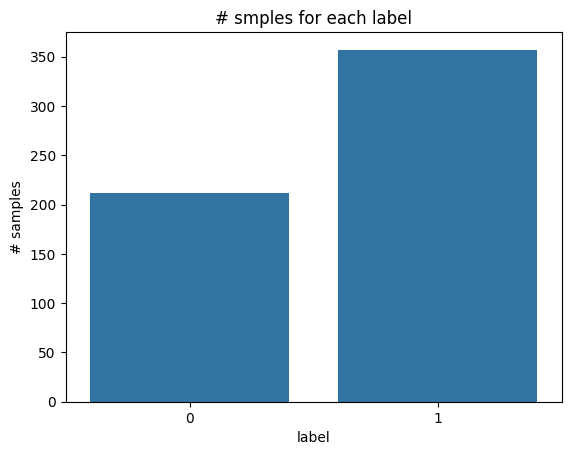

In [11]:
label_counts = df['label'].value_counts()
print(label_counts)

sns.countplot(x='label', data=df)
plt.title('# smples for each label')
plt.xlabel('label')
plt.ylabel('# samples')
plt.show()

## ج

In [15]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['label'])
y = df['label']

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print("Data shapes after oversampeling", X_resampled.shape)
print(pd.Series(y_resampled).value_counts())

Data shapes after oversampeling (714, 30)
label
0    357
1    357
Name: count, dtype: int64


## د

In [16]:
print(df.isnull().sum())
print( 'Does we have null values?', df.isnull().values.any())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64
Does we have null values? False


## ه

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

## و

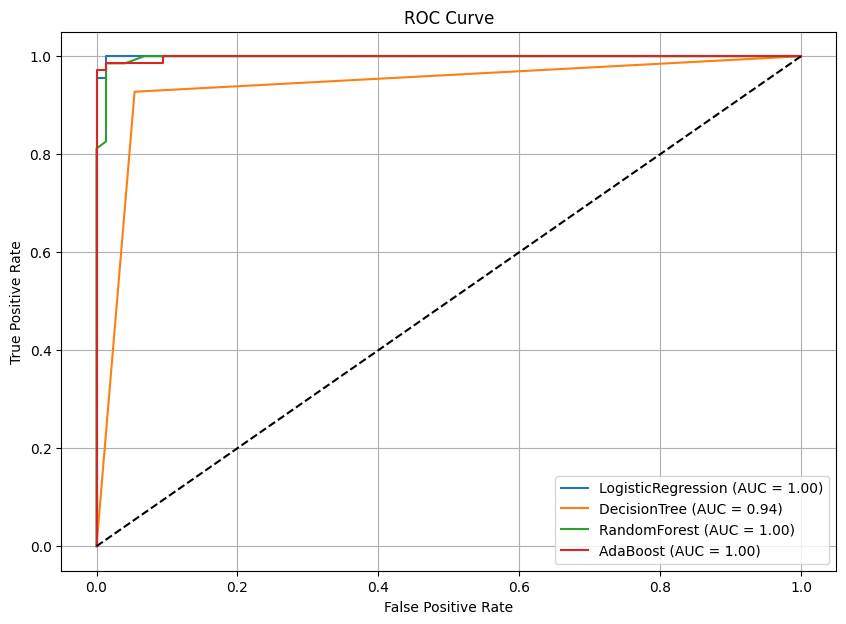

In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)


models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## ز

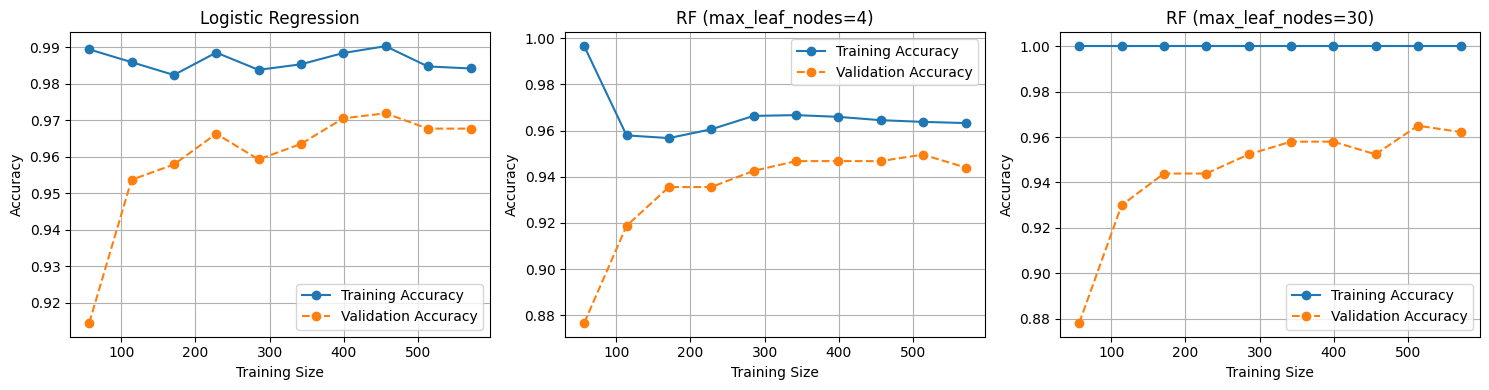

In [19]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, title, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='accuracy',
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        random_state=42
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
    plt.plot(train_sizes, test_mean, 'o--', label="Validation Accuracy")
    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

plt.figure(figsize=(15, 4))

# Logistic Regression
plt.subplot(1, 3, 1)
plot_learning_curve(LogisticRegression(), "Logistic Regression", X_scaled, y_resampled)

# Random Forest
plt.subplot(1, 3, 2)
plot_learning_curve(RandomForestClassifier(max_leaf_nodes=4), "RF (max_leaf_nodes=4)", X_scaled, y_resampled)

# Random Forest (higher complexity)
plt.subplot(1, 3, 3)
plot_learning_curve(RandomForestClassifier(max_leaf_nodes=30), "RF (max_leaf_nodes=30)", X_scaled, y_resampled)

plt.tight_layout()
plt.show()

## Read this blog post(as a recommendation)

https://www.dataquest.io/blog/learning-curves-machine-learning/

## بخش ۳

### downloading the dataset...

In [20]:
!wget 'https://raw.githubusercontent.com/kwanhong66/KaggleShoveling/master/token/kaggle.json'
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download jigsaw-toxic-comment-classification-challenge

--2025-05-21 11:04:04--  https://raw.githubusercontent.com/kwanhong66/KaggleShoveling/master/token/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      63  --.-KB/s    in 0s      

2025-05-21 11:04:04 (1.43 MB/s) - ‘kaggle.json’ saved [63/63]

  0% 0.00/52.6M [00:00<?, ?B/s]
100% 52.6M/52.6M [00:00<00:00, 1.25GB/s]


In [21]:
!mkdir ./toxic-comment-zips
!unzip -o ./jigsaw-toxic-comment-classification-challenge.zip -d ./toxic-comment-zips
!mkdir ./toxic-comment
!unzip -o ./toxic-comment-zips/train.csv.zip -d ./toxic-comment
!unzip -o ./toxic-comment-zips/test.csv.zip -d ./toxic-comment ## DON'T USE THIS!
!rm -rf ./toxic-comment-zips


Archive:  ./jigsaw-toxic-comment-classification-challenge.zip
  inflating: ./toxic-comment-zips/sample_submission.csv.zip  
  inflating: ./toxic-comment-zips/test.csv.zip  
  inflating: ./toxic-comment-zips/test_labels.csv.zip  
  inflating: ./toxic-comment-zips/train.csv.zip  
Archive:  ./toxic-comment-zips/train.csv.zip
  inflating: ./toxic-comment/train.csv  
Archive:  ./toxic-comment-zips/test.csv.zip
  inflating: ./toxic-comment/test.csv  


In [22]:
df = pd.read_csv('./toxic-comment/train.csv')
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


## ج

toxic            15294
obscene           8449
insult            7877
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


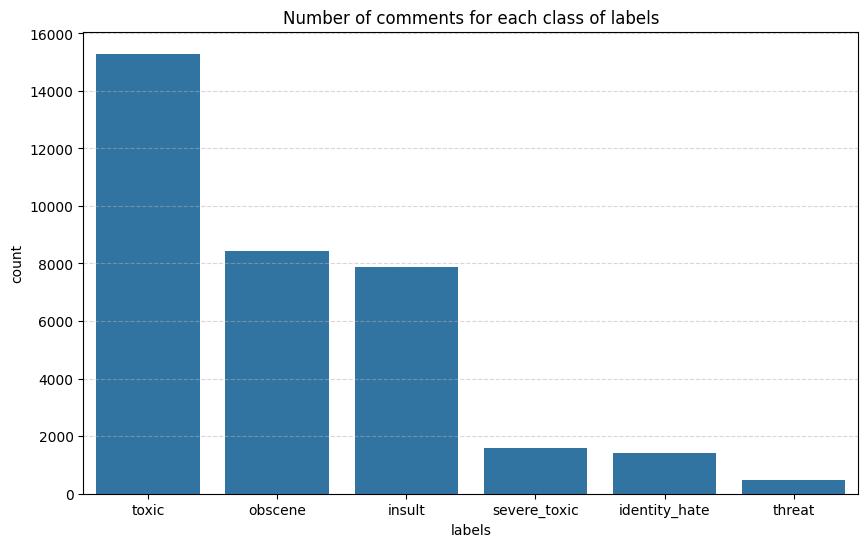

In [23]:

label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

label_counts = df[label_cols].sum().sort_values(ascending=False)
print(label_counts)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Number of comments for each class of labels")
plt.xlabel("labels")
plt.ylabel("count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## د

toxic            942
obscene          535
insult           511
severe_toxic     102
identity_hate     91
threat            20
dtype: int64


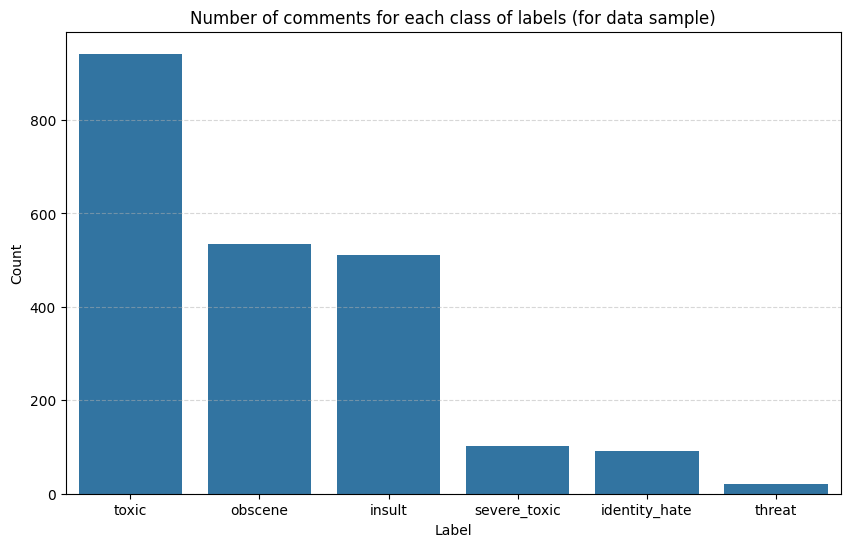

In [24]:
sample_df = df.sample(n=10000, random_state=42)
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
sample_counts = sample_df[label_cols].sum().sort_values(ascending=False)
print(sample_counts)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=sample_counts.index, y=sample_counts.values)
plt.title("Number of comments for each class of labels (for data sample)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [25]:
#@title preprocess_and_vectorize implementation

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
nltk.download('stopwords')

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

stop_words = set(stopwords.words('english'))
# stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

def preprocess_and_vectorize(sample_df):
  sample_df['comment_text'] = sample_df['comment_text'].str.lower()
  sample_df['comment_text'] = sample_df['comment_text'].apply(cleanHtml)
  sample_df['comment_text'] = sample_df['comment_text'].apply(cleanPunc)
  sample_df['comment_text'] = sample_df['comment_text'].apply(keepAlpha)
  sample_df['comment_text'] = sample_df['comment_text'].apply(removeStopWords)
  sample_df['comment_text'] = sample_df['comment_text'].apply(stemming)

  vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
  vectorizer.fit(sample_df['comment_text'])
  X = vectorizer.transform(sample_df['comment_text'])
  y = sample_df.drop(labels = ['id','comment_text'], axis=1)
  return X, y


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Call `preprocess_and_vectorize(sample_df)` to vectorize the text

In [26]:
X, y = preprocess_and_vectorize(sample_df)
X, y

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 879295 stored elements and shape (10000, 537191)>,
         toxic  severe_toxic  obscene  threat  insult  identity_hate
 119105      0             0        0       0       0              0
 131631      0             0        0       0       0              0
 125326      0             0        0       0       0              0
 111256      0             0        0       0       0              0
 83590       0             0        0       0       0              0
 ...       ...           ...      ...     ...     ...            ...
 25725       0             0        0       0       0              0
 46449       1             0        0       0       1              0
 108844      0             0        0       0       0              0
 142353      0             0        0       0       0              0
 143654      0             0        0       0       0              0
 
 [10000 rows x 6 columns])

## ز

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## ح

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

ovr_model = OneVsRestClassifier(LogisticRegression(max_iter=1000, class_weight='balanced'))
ovr_model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                 max_iter=1000))

In [33]:
from sklearn.multioutput import ClassifierChain

chain_model = ClassifierChain(LogisticRegression(max_iter=1000, class_weight='balanced'))
chain_model.fit(X_train, y_train)

ClassifierChain(base_estimator=LogisticRegression(class_weight='balanced',
                                                  max_iter=1000))

## ط


Label: toxic
Accuracy: 0.945
Recall: 0.497


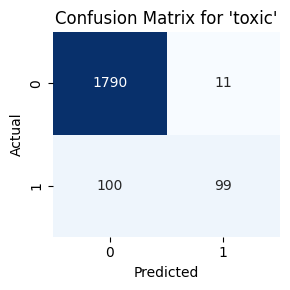


Label: severe_toxic
Accuracy: 0.984
Recall: 0.286


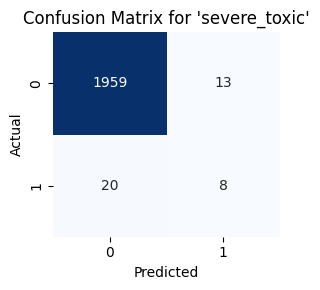


Label: obscene
Accuracy: 0.973
Recall: 0.566


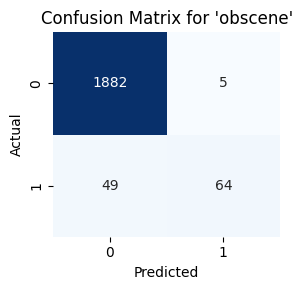


Label: threat
Accuracy: 0.999
Recall: 0.000


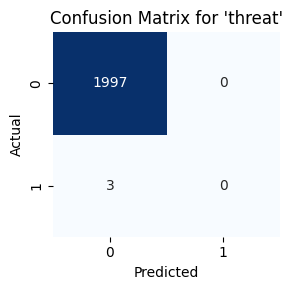


Label: insult
Accuracy: 0.964
Recall: 0.469


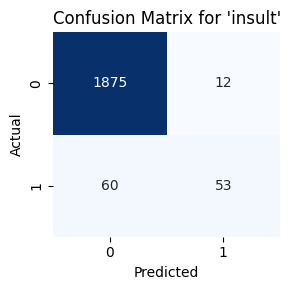


Label: identity_hate
Accuracy: 0.991
Recall: 0.267


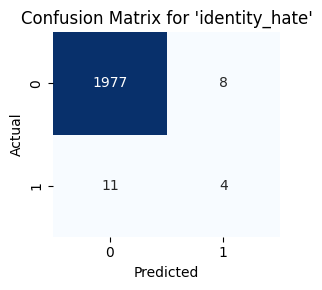

In [34]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

labels = y.columns


y_pred = ovr_model.predict(X_test)


for i, label in enumerate(labels):
    y_true_label = y_test.iloc[:, i]
    y_pred_label = y_pred[:, i]

    acc = accuracy_score(y_true_label, y_pred_label)
    rec = recall_score(y_true_label, y_pred_label)
    cm = confusion_matrix(y_true_label, y_pred_label)

    print(f"\nLabel: {label}")
    print(f"Accuracy: {acc:.3f}")
    print(f"Recall: {rec:.3f}")


    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for '{label}'")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()